In [1]:
from NeuralNetwork2 import ANN2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import joblib

In [179]:
adversial_images = []

In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# train_data = train_data.sample(n=600,random_state=1)
# test_data = test_data.sample(n=100,random_state=1)

In [8]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [9]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

In [10]:
model = joblib.load('Trained1Network.model')

In [11]:
# sample = 80
# sample = 25
# sample = 30 ## Best one
# sample = 45 ## Best one
# sample = 11 ## Best one

Target 6
Target [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


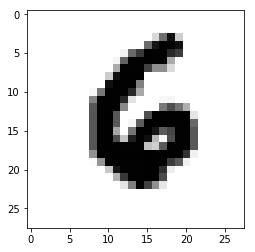

In [212]:
sample = 25
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred)))
print("Target {}".format(y_test[sample]))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray_r')
plt.show()

In [213]:
X_target = X_test[sample].ravel()
y_goal = y_test[sample+1]

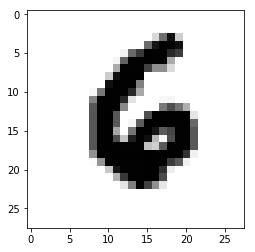

Predicted : 6
Adversial Goal : 1
Predicted : [1.79338775e-05 1.25787575e-04 1.83624006e-03 1.90627299e-07
 4.47860815e-02 2.23625715e-04 9.68957656e-01 9.15359700e-08
 2.34619401e-05 7.95156198e-04]
Adversial Goal : [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [214]:
plt.imshow(X_target.reshape(28,28),cmap='gray_r')
plt.show()
print('Predicted : {}'.format(np.argmax(y_pred)))
print('Adversial Goal : {}'.format(np.argmax(y_goal)))
print('Predicted : {}'.format(y_pred))
print('Adversial Goal : {}'.format(y_goal))

In [215]:
adversial_image = model.get_adversial_image(X_target=X_target,
                                            y_goal=y_goal,
                                            seed=2,
                                            learning_rate=0.1,
                                            _lambda=0.4,
                                            epochs=2000,
                                            print_results=True)

Epoch ---  0  MSE :  [105.26643038]
Epoch ---  100  MSE :  [2.15455661]
Epoch ---  200  MSE :  [2.12391865]
Epoch ---  300  MSE :  [2.12390386]
Epoch ---  400  MSE :  [2.12390364]
Epoch ---  500  MSE :  [2.12390363]
Epoch ---  600  MSE :  [2.12390363]
Epoch ---  700  MSE :  [2.12390363]
Epoch ---  800  MSE :  [2.12390363]
Epoch ---  900  MSE :  [2.12390363]
Epoch ---  1000  MSE :  [2.12390363]
Epoch ---  1100  MSE :  [2.12390363]
Epoch ---  1200  MSE :  [2.12390363]
Epoch ---  1300  MSE :  [2.12390363]
Epoch ---  1400  MSE :  [2.12390363]
Epoch ---  1500  MSE :  [2.12390363]
Epoch ---  1600  MSE :  [2.12390363]
Epoch ---  1700  MSE :  [2.12390363]
Epoch ---  1800  MSE :  [2.12390363]
Epoch ---  1900  MSE :  [2.12390363]


In [216]:
print('Last Epoch Error : ', model.adversial_loss[-1])

Last Epoch Error :  [2.12390363]


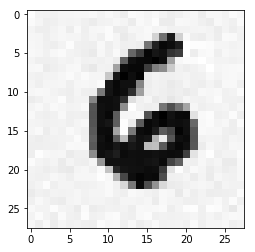

In [217]:
plt.imshow(adversial_image.reshape(28,28),cmap='gray_r')
plt.show()

Adversial Prediction 6
Actual Prediction [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


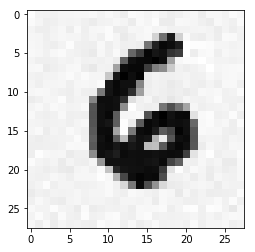

In [218]:
y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()
print("Adversial Prediction {}".format(np.argmax(y_pred_adversial)))
print("Actual Prediction {}".format(y_test[sample]))
plt.imshow(adversial_image.reshape(28,28),cmap='gray_r')
plt.show()

/home/rishi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


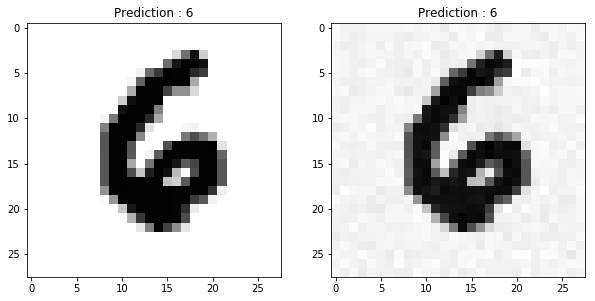

In [219]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
figsize=(10,3)
ax1.imshow(X_target.reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(y_test[sample])))
ax2.imshow(adversial_image.reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(y_pred_adversial)))
fig.show()

In [220]:
image = {'adversial_image':adversial_image,
         'actual_image':X_target,
         'y_pred_adversial':y_pred_adversial,
         'actual_prediction':y_test[sample]}

In [221]:
adversial_images.append(image)

In [222]:
len(adversial_images)

4

In [223]:
import joblib

In [224]:
joblib.dump(adversial_images,'adversial_images.ik')

['adversial_images.ik']

In [166]:
np.around(y_pred_adversial,decimals=2)

array([0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.17, 0.  , 0.  , 0.02])

In [167]:
np.around(y_pred, decimals=2)

array([0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.97, 0.  , 0.  , 0.  ])

In [18]:
np.array(range(y_pred.shape[0])) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

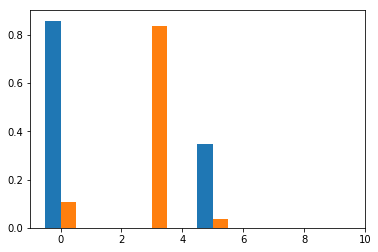

In [19]:
width=0.5
plt.bar(np.array(range(y_pred.shape[0])) - width/2,y_pred, width=width,label='Actual Prediction')
plt.bar(np.array(range(y_pred_adversial.shape[0])) + width/2,y_pred_adversial, width=width,label='Adversial Prediction')
plt.show()

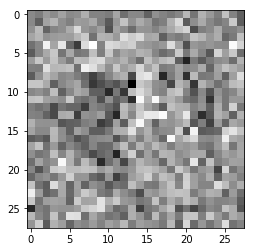

In [18]:
plt.imshow((adversial_image-X_target).reshape(28,28),cmap='gray')
plt.show()

In [ ]:
fig = plt.figure()
ims = []
for i in range(len(adversial_images)):
    im = plt.imshow(adversial_images[i].reshape(28,28), cmap='gray', animated=True)
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)
ani.save('dynamic_images.mp4')
plt.show()

KeyboardInterrupt: 

In [21]:
adversial_images[1]

array([-7.77562253e-03, -1.77955348e-02,  5.98165523e-03, -6.14363141e-03,
        1.34485219e-02, -6.59610478e-03, -3.60129743e-03,  2.48271630e-02,
       -1.16119463e-02, -1.16827944e-02, -1.87642556e-02,  1.63031681e-02,
       -2.91652775e-02, -8.30382903e-03, -9.50964421e-03, -4.12572862e-02,
       -1.48674682e-03, -1.28338901e-02, -2.13209392e-02, -1.01953809e-02,
        3.18871416e-02, -2.39887829e-02,  2.72576586e-02,  5.99976515e-03,
       -1.65666079e-02,  3.98124966e-02, -1.31521625e-02, -4.28781866e-02,
       -8.36098180e-03, -4.29245763e-02,  1.37816735e-02,  2.80144718e-02,
       -2.79448501e-03, -1.50698074e-02,  8.55873689e-03,  5.61887293e-03,
        1.83181744e-02, -1.49775539e-02, -4.80877048e-02,  5.00187896e-03,
        4.22676399e-02, -9.94743038e-04,  2.10413524e-02,  5.22824438e-03,
       -2.55977136e-02, -1.58793099e-02,  2.59966721e-02,  5.95812902e-02,
       -4.65408672e-02, -3.11858891e-03,  1.99357167e-02, -8.66408755e-03,
       -2.23566098e-02, -